CLOPE ALGORITHM

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import csv

In [14]:
#remove duplicate elements in list
def Remove_Duplicate(duplicate): 
    list = [] 
    for item in duplicate: 
        if item not in list: 
            list.append(item) 
    return list

In [15]:
#update the cluster feature data when adding a transaction
def Delta_Add(cluster, transaction, r):
        
    #creat a list to store all items of the cluster
    items = []
    j=0
    while j< len(cluster): 
        k=0
        while k<len(cluster[j]):
            items.append(cluster[j][k])
            k+=1
        j+=1
    
    
    #dist_item list stores distint items after removing duplicates items
    dist_items=Remove_Duplicate(items)
    
    #cluster size
    C_S=len(items)
    
    #cluster width
    C_W=len(dist_items)
    
    #number of transactions in cluster
    C_N=len(cluster)
    
    
    #initialize S_new and W_new
    S_new = C_S + len(transaction)
    W_new = C_W
    
    
    #for each item in transaction
    i=0
    while i<len(transaction):
        #if occurence of i th item of transaction in cluster is 0
        if(items.count(transaction[i])==0):
            #increase the width of the cluster
            W_new+=1
        i+=1
  
    #print ("W_new = ",  W_new)
    
    #avoid div =0 when cluster is empty
    div=0
    if C_W==0:
        div = 1
    else:
        div = math.pow(C_W, r)
        
    #return the change of profit 
    return S_new*(C_N+1)/math.pow(W_new, r)-C_S*C_N/div

In [16]:
# find_max_profit_cluster
def Find_Max_Profit_Cluster(transaction, repulsion):
    max_profit = 0
    i_max_profit_cluster = 0

    i = 0
    # for each cluster in clusters
    while i < len(clusters):

        # calculate the change of profit when put transaction in existing cluster
        profit = Delta_Add(clusters[i], transaction, repulsion)
        print("if put t in cluster: ", i,  " -- delta profit =", profit)

        # if profit > max_profit
        if profit > max_profit:
            max_profit = profit
            i_max_profit_cluster = i

        i += 1

    # print the index of max delta profit cluster after appending the transaction
    print("max delta profit at cluster: ", i_max_profit_cluster)
    print("put t in cluster: ", i_max_profit_cluster)
    print("\n")

    # return the index of max profit cluster
    return i_max_profit_cluster


In [17]:
# Phrase 1 - Initialization
def Initialization(dataset, clusters, clusters_index, repulsion):

    print("Phrase 1 - Initialization")

    # set index of cluster with max profit to 0
    i_max_profit_cluster = 0

    i = 0
    # for each transaction in dataset
    while i < len(dataset):

        # print the index of transaction in dataset
        print("t -- ", i)

        # if the index of max profit cluster is large or equal to the index of clusters
        if i_max_profit_cluster >= len(clusters) - 1:
            cluster = []
            clusters.append(cluster)

        # the i th transaction
        transaction = dataset[i]

        # find index of cluster that create maximum profit after add transaction
        i_max_profit_cluster = Find_Max_Profit_Cluster(transaction, repulsion)

        # appenend the transaction in that cluster
        clusters[i_max_profit_cluster].append(transaction)

        # record the location of cluster for transtranction
        clusters_index.append(i_max_profit_cluster)

        i += 1

        # if the last cluster of clusters is empty, remove it
    if len(clusters[len(clusters) - 1]) == 0:
        del clusters[len(clusters) - 1]

    # print(clusters)

    print("\n")

In [18]:
# Phrase 2 - Iterate
def Iterate(dataset, clusters, clusters_index, repulsion):

    print("Phrase 2 - Iterate")

    # set moved = True
    moved = True

    # repeat until moved is False
    while moved:

        i = 0
        moved = False

        # for each transaction in dataset
        k = 0
        while k < len(dataset):

            # print the index of transaction in dataset
            print("t -- ", k)

            # the k-th transaction
            transaction = dataset[k]

            # index of clusters_index
            i_current_cluster = clusters_index[i]

            clusters[i_current_cluster].remove(transaction)

            # find index of cluster that create maximum profit after add transaction
            i_max_profit_cluster = Find_Max_Profit_Cluster(transaction, repulsion)

            # appenend the transaction in that cluster
            clusters[i_max_profit_cluster].append(transaction)

            # if index of max profit cluster is not equal to the #index of clusters_index
            if i_max_profit_cluster != i_current_cluster:
                clusters_index[i] = i_max_profit_cluster
                moved = True

            k += 1

            i += 1


**Experiment: Random transaction dataset**

1.Load the data

In [19]:
with open('transaction.csv', mode='w') as employee_file:
    writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
   
    #read the data and put data in dataset list
    names = ['xiao ming', 'david']
    food1 = ['potato', 'bread', 'banana', 'apple']
    food2 = ['tomato', 'orange', 'egg', 'pizza']
    drink1 = ['milk', 'juice']
    drink2 = ['tea', 'coffee']


    dataset = []

    i=0
    while i<2000:
    
        rand_food_index=0
        rand_drink_index=0
   
        item1=[]
        item2=[]
        item3=[]
   
        rand_name_index = random.randint(0, len(names)-1)
        name = names[rand_name_index]
    
        if rand_name_index == 0:
            rand_food_index = random.randint(0, len(food1)-1)
            rand_drink_index = random.randint(0, len(drink1)-1)
            item1 = food1[rand_food_index]
            item2= drink1[rand_drink_index]
        
        else:
            rand_food_index = random.randint(0, len(food2)-1)
            rand_drink_index = random.randint(0, len(drink2)-1)
            item1 = food2[rand_food_index]
            item2= drink2[rand_drink_index]
    
         
        transaction = []
        transaction.append(name)    
        transaction.append(item1)
        transaction.append(item2)
  
        writer.writerow(transaction)
        dataset.append(transaction)

        i+=1  

In [20]:
#print dataset size
print("dataset size = ", len(dataset),"\n")

dataset size =  2000 



2. Data preprecessing

In [21]:
#remove first item of each transactions because it is class
#record it in the class list
class_list =[]
j=0
while j<len(dataset):
    class_list.append(dataset[j][0])
    del dataset[j][0]
    j+=1
    
print(class_list)

['xiao ming', 'david', 'david', 'david', 'david', 'xiao ming', 'david', 'david', 'david', 'xiao ming', 'david', 'david', 'xiao ming', 'xiao ming', 'david', 'xiao ming', 'xiao ming', 'xiao ming', 'xiao ming', 'xiao ming', 'xiao ming', 'david', 'david', 'xiao ming', 'david', 'david', 'david', 'david', 'david', 'xiao ming', 'xiao ming', 'xiao ming', 'david', 'david', 'xiao ming', 'david', 'david', 'xiao ming', 'xiao ming', 'david', 'xiao ming', 'xiao ming', 'xiao ming', 'xiao ming', 'xiao ming', 'david', 'david', 'xiao ming', 'xiao ming', 'david', 'david', 'david', 'xiao ming', 'david', 'david', 'xiao ming', 'david', 'xiao ming', 'xiao ming', 'david', 'david', 'david', 'david', 'xiao ming', 'xiao ming', 'david', 'david', 'david', 'xiao ming', 'xiao ming', 'xiao ming', 'xiao ming', 'david', 'xiao ming', 'david', 'xiao ming', 'xiao ming', 'david', 'david', 'david', 'xiao ming', 'xiao ming', 'david', 'david', 'xiao ming', 'xiao ming', 'david', 'xiao ming', 'david', 'david', 'david', 'xiao mi

In [22]:
#show all attribute values of each attributes 
transaction_size =len(dataset[0])

attribute_list=[]
i=0
while i<transaction_size:
    attribute=[]
    j=0
    while j<len(dataset):
        attribute.append(dataset[j][i])
        j+=1
     
    #remove duplicate item in attribute data
    attribute_list.append(Remove_Duplicate(attribute))
    
    i+=1
    

items=0
k=0
while k<len(attribute_list):
    print(attribute_list[k])
    items=items+len(attribute_list[k])
    k+=1

    
#print number of distinct attribute value
print("\n","number of distinct attribute value: ", items)

['potato', 'orange', 'pizza', 'apple', 'tomato', 'banana', 'egg', 'bread']
['juice', 'tea', 'coffee', 'milk']

 number of distinct attribute value:  12


In [23]:
#remove missing value ='?10' of the transactions in dataset
ignore=0
a=0
while a<len(dataset) :    
    if'?10' in dataset[a]:
        dataset[a].remove('?10')
        ignore+=1
    a+=1

#print the number of ingored 
print(ignore, "missing attribute values ignored")

0 missing attribute values ignored


In [24]:
#print each transaction in dataset
l=0
while l<len(dataset):
    print("t = ", l)
    print(dataset[l])
    l+=1

t =  0
['potato', 'juice']
t =  1
['orange', 'tea']
t =  2
['orange', 'coffee']
t =  3
['pizza', 'coffee']
t =  4
['pizza', 'tea']
t =  5
['apple', 'milk']
t =  6
['pizza', 'coffee']
t =  7
['tomato', 'tea']
t =  8
['tomato', 'coffee']
t =  9
['apple', 'juice']
t =  10
['tomato', 'coffee']
t =  11
['tomato', 'tea']
t =  12
['banana', 'juice']
t =  13
['apple', 'milk']
t =  14
['pizza', 'tea']
t =  15
['apple', 'juice']
t =  16
['apple', 'juice']
t =  17
['potato', 'milk']
t =  18
['potato', 'juice']
t =  19
['banana', 'milk']
t =  20
['banana', 'milk']
t =  21
['pizza', 'coffee']
t =  22
['tomato', 'tea']
t =  23
['apple', 'milk']
t =  24
['orange', 'coffee']
t =  25
['egg', 'tea']
t =  26
['tomato', 'coffee']
t =  27
['pizza', 'tea']
t =  28
['orange', 'coffee']
t =  29
['bread', 'juice']
t =  30
['potato', 'juice']
t =  31
['bread', 'milk']
t =  32
['egg', 'coffee']
t =  33
['orange', 'coffee']
t =  34
['potato', 'juice']
t =  35
['pizza', 'coffee']
t =  36
['tomato', 'coffee']
t =  

['egg', 'tea']
t =  669
['banana', 'milk']
t =  670
['bread', 'milk']
t =  671
['potato', 'juice']
t =  672
['apple', 'milk']
t =  673
['tomato', 'coffee']
t =  674
['banana', 'juice']
t =  675
['tomato', 'coffee']
t =  676
['orange', 'tea']
t =  677
['orange', 'tea']
t =  678
['tomato', 'coffee']
t =  679
['tomato', 'coffee']
t =  680
['pizza', 'tea']
t =  681
['potato', 'milk']
t =  682
['tomato', 'coffee']
t =  683
['potato', 'juice']
t =  684
['egg', 'tea']
t =  685
['tomato', 'tea']
t =  686
['tomato', 'tea']
t =  687
['tomato', 'tea']
t =  688
['orange', 'coffee']
t =  689
['banana', 'milk']
t =  690
['potato', 'milk']
t =  691
['pizza', 'tea']
t =  692
['tomato', 'tea']
t =  693
['apple', 'milk']
t =  694
['potato', 'juice']
t =  695
['pizza', 'tea']
t =  696
['orange', 'tea']
t =  697
['orange', 'coffee']
t =  698
['egg', 'tea']
t =  699
['egg', 'tea']
t =  700
['pizza', 'tea']
t =  701
['bread', 'juice']
t =  702
['apple', 'juice']
t =  703
['pizza', 'coffee']
t =  704
['tomat

t =  1522
['orange', 'coffee']
t =  1523
['egg', 'tea']
t =  1524
['orange', 'tea']
t =  1525
['potato', 'juice']
t =  1526
['apple', 'juice']
t =  1527
['egg', 'coffee']
t =  1528
['pizza', 'coffee']
t =  1529
['egg', 'tea']
t =  1530
['bread', 'milk']
t =  1531
['banana', 'juice']
t =  1532
['tomato', 'tea']
t =  1533
['potato', 'juice']
t =  1534
['banana', 'milk']
t =  1535
['bread', 'milk']
t =  1536
['banana', 'juice']
t =  1537
['egg', 'tea']
t =  1538
['potato', 'milk']
t =  1539
['orange', 'coffee']
t =  1540
['tomato', 'coffee']
t =  1541
['pizza', 'coffee']
t =  1542
['bread', 'milk']
t =  1543
['pizza', 'coffee']
t =  1544
['tomato', 'coffee']
t =  1545
['orange', 'tea']
t =  1546
['orange', 'tea']
t =  1547
['apple', 'milk']
t =  1548
['pizza', 'coffee']
t =  1549
['tomato', 'coffee']
t =  1550
['orange', 'coffee']
t =  1551
['orange', 'coffee']
t =  1552
['potato', 'milk']
t =  1553
['pizza', 'tea']
t =  1554
['banana', 'juice']
t =  1555
['tomato', 'coffee']
t =  1556
['

3.Run the CLOPE by setting different repulsion. Compute number of clusters and purity for each repulsion

In [25]:
# define a function compute the purity
def Purity(dataset, clusters, class_list):

    purity = 0
    # for each cluster in clusters
    w = 0
    while w < len(clusters):

        # reset num_edibles and the num_poisonous to 0
        num_class1 = 0
        num_class2 = 0
        
        # for each tansaction in cluster
        y = 0
        while y < len(clusters[w]):
            
            # the y-th transaction in cluster clusters[w]
            transaction = clusters[w][y]

            # for each transaction in dataset
            if transaction[0] == food1[0] or transaction[0] == food1[1] or transaction[0] == food1[2] or transaction[0] ==food1[3]:
                num_class1 += 1
            else:
                num_class2 += 1
                # index of transaction in dataset

            # index of transaction in cluster
            y += 1
            
        # compute the purity by summing up larger one of the num_edibles and the num_poisonous in each cluster
        purity = purity + max(num_class1, num_class2)
        
        # index of cluster in clusters
        w += 1

    return purity

Run the CLOPE

In [26]:
#Cluster transactional data by testing different repulsion values (from 0.5 to 4.0) 
#compute the number of clusters and purity value
repulsion1 = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
repulsion = [1.0]

#num_clusters list stores number of clusters generated for each repulsion
num_clusters_list = []

#purity_list stores purity for each repulsion
purity_list = []

#result_list stores experimental result for each repulsion
result_list = []

m = 0
while m < len(repulsion):

    result = ' '

    r = repulsion[m]
    print("repulsion = ", r,)
    print("-------------------------------------------------------")

    # location of cluster for each transaction
    clusters_index = []

    # empty clusters
    clusters = []

    Initialization(dataset, clusters, clusters_index, r)
    Iterate(dataset, clusters, clusters_index, r)

    # append number of clusters in num_clusters_list
    num_clusters_list.append(len(clusters))

    # append purity in purity list
    purity_list.append(Purity(dataset, clusters, class_list))

    # print number of clusters and purity for each repulsion
    result = "repulsion = ", r, "-- no.clusters = ", len(clusters), "-- purity = ", Purity(dataset, clusters, class_list)

    # print the result for each repulsion
    print(result, "\n\n\n")

    #append result in result list
    result_list.append(str(result))

    m += 1

repulsion =  1.0
-------------------------------------------------------
Phrase 1 - Initialization
t --  0
if put t in cluster:  0  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1
if put t in cluster:  0  -- delta profit = 1.0
if put t in cluster:  1  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  2
if put t in cluster:  0  -- delta profit = 1.6
if put t in cluster:  1  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  3
if put t in cluster:  0  -- delta profit = 1.733333333333333
if put t in cluster:  1  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  4
if put t in cluster:  0  -- delta profit = 3.000000000000001
if put t in cluster:  1  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  5
if put t in cluster:  0  -- delta profit = 0.6666666666666661
if put t in cluster:  1  -- delta profit = 1.0
max delta profit a

if put t in cluster:  0  -- delta profit = 33.111111111111086
if put t in cluster:  1  -- delta profit = -47.02857142857141
if put t in cluster:  2  -- delta profit = -11.066666666666663
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  117
if put t in cluster:  0  -- delta profit = -199.81818181818176
if put t in cluster:  1  -- delta profit = 18.80000000000001
if put t in cluster:  2  -- delta profit = -11.066666666666663
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  118
if put t in cluster:  0  -- delta profit = 33.55555555555566
if put t in cluster:  1  -- delta profit = -22.066666666666663
if put t in cluster:  2  -- delta profit = -11.066666666666663
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  119
if put t in cluster:  0  -- delta profit = -97.7555555555557
if put t in cluster:  1  -- delta profit =

if put t in cluster:  2  -- delta profit = -62.06666666666666
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  210
if put t in cluster:  0  -- delta profit = 56.666666666666515
if put t in cluster:  1  -- delta profit = -225.3142857142857
if put t in cluster:  2  -- delta profit = -62.06666666666666
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  211
if put t in cluster:  0  -- delta profit = 57.11111111111131
if put t in cluster:  1  -- delta profit = -225.3142857142857
if put t in cluster:  2  -- delta profit = -62.06666666666666
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  212
if put t in cluster:  0  -- delta profit = 57.55555555555566
if put t in cluster:  1  -- delta profit = -225.3142857142857
if put t in cluster:  2  -- delta profit = -62.06666666666666
if put t in cluster:  3  -- delta profit = 1.0

if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  295
if put t in cluster:  0  -- delta profit = 78.0
if put t in cluster:  1  -- delta profit = -489.3142857142857
if put t in cluster:  2  -- delta profit = -145.26666666666654
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  296
if put t in cluster:  0  -- delta profit = 78.44444444444434
if put t in cluster:  1  -- delta profit = -262.5999999999999
if put t in cluster:  2  -- delta profit = -145.26666666666654
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  297
if put t in cluster:  0  -- delta profit = 78.88888888888869
if put t in cluster:  1  -- delta profit = -489.3142857142857
if put t in cluster:  2  -- delta profit = -145.26666666666654
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  298
if put 

if put t in cluster:  0  -- delta profit = -2108.5858585858587
if put t in cluster:  1  -- delta profit = 68.40000000000009
if put t in cluster:  2  -- delta profit = -246.06666666666683
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  385
if put t in cluster:  0  -- delta profit = -1113.022222222222
if put t in cluster:  1  -- delta profit = -435.4000000000001
if put t in cluster:  2  -- delta profit = 53.19999999999982
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  386
if put t in cluster:  0  -- delta profit = -1113.022222222222
if put t in cluster:  1  -- delta profit = 69.19999999999982
if put t in cluster:  2  -- delta profit = -474.4571428571428
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  387
if put t in cluster:  0  -- delta profit = -1113.022222222222
if put t in cluster:  1  -- delta profit = -4

if put t in cluster:  0  -- delta profit = -2804.3434343434346
if put t in cluster:  1  -- delta profit = 91.60000000000036
if put t in cluster:  2  -- delta profit = -414.0666666666666
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  467
if put t in cluster:  0  -- delta profit = 119.33333333333394
if put t in cluster:  1  -- delta profit = -1445.4285714285716
if put t in cluster:  2  -- delta profit = -414.0666666666666
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  468
if put t in cluster:  0  -- delta profit = -1500.2222222222226
if put t in cluster:  1  -- delta profit = -804.666666666667
if put t in cluster:  2  -- delta profit = 67.59999999999991
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  469
if put t in cluster:  0  -- delta profit = -1500.2222222222226
if put t in cluster:  1  -- delta profit = 

if put t in cluster:  1  -- delta profit = -1107.3999999999996
if put t in cluster:  2  -- delta profit = 82.0
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  553
if put t in cluster:  0  -- delta profit = -2092.4222222222234
if put t in cluster:  1  -- delta profit = 107.60000000000036
if put t in cluster:  2  -- delta profit = -1153.3142857142861
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  554
if put t in cluster:  0  -- delta profit = -3919.4949494949506
if put t in cluster:  1  -- delta profit = 108.39999999999964
if put t in cluster:  2  -- delta profit = -638.2666666666669
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  555
if put t in cluster:  0  -- delta profit = -2092.4222222222234
if put t in cluster:  1  -- delta profit = 109.20000000000073
if put t in cluster:  2  -- delta profit = -1153.3142

if put t in cluster:  1  -- delta profit = -2553.3142857142857
if put t in cluster:  2  -- delta profit = -926.2666666666673
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  639
if put t in cluster:  0  -- delta profit = -2798.5555555555547
if put t in cluster:  1  -- delta profit = -2553.3142857142857
if put t in cluster:  2  -- delta profit = 98.79999999999927
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  640
if put t in cluster:  0  -- delta profit = -2798.5555555555547
if put t in cluster:  1  -- delta profit = 122.0
if put t in cluster:  2  -- delta profit = -1686.114285714285
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  641
if put t in cluster:  0  -- delta profit = -5220.828282828283
if put t in cluster:  1  -- delta profit = 122.79999999999927
if put t in cluster:  2  -- delta profit = -942.066666

if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  726
if put t in cluster:  0  -- delta profit = 186.8888888888905
if put t in cluster:  1  -- delta profit = -3282.4571428571435
if put t in cluster:  2  -- delta profit = -1107.3999999999996
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  727
if put t in cluster:  0  -- delta profit = -7007.979797979799
if put t in cluster:  1  -- delta profit = 138.0
if put t in cluster:  2  -- delta profit = -1107.3999999999996
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  728
if put t in cluster:  0  -- delta profit = -3770.0888888888876
if put t in cluster:  1  -- delta profit = 138.79999999999927
if put t in cluster:  2  -- delta profit = -1975.2571428571428
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  729
if 

max delta profit at cluster:  2
put t in cluster:  2


t --  797
if put t in cluster:  0  -- delta profit = 201.55555555555475
if put t in cluster:  1  -- delta profit = -4190.114285714286
if put t in cluster:  2  -- delta profit = -1399.666666666667
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  798
if put t in cluster:  0  -- delta profit = 202.0
if put t in cluster:  1  -- delta profit = -4190.114285714286
if put t in cluster:  2  -- delta profit = -1399.666666666667
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  799
if put t in cluster:  0  -- delta profit = 202.44444444444525
if put t in cluster:  1  -- delta profit = -2379.3999999999996
if put t in cluster:  2  -- delta profit = -1399.666666666667
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  800
if put t in cluster:  0  -- delta profit = -4438.1999

if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  856
if put t in cluster:  0  -- delta profit = -4948.755555555552
if put t in cluster:  1  -- delta profit = -4825.314285714285
if put t in cluster:  2  -- delta profit = 134.0
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  857
if put t in cluster:  0  -- delta profit = 214.0
if put t in cluster:  1  -- delta profit = -4825.314285714285
if put t in cluster:  2  -- delta profit = -1769.2666666666664
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  858
if put t in cluster:  0  -- delta profit = 214.44444444444525
if put t in cluster:  1  -- delta profit = -4825.314285714285
if put t in cluster:  2  -- delta profit = -1769.2666666666664
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  859
if put t in cluste

if put t in cluster:  2  -- delta profit = -3439.2571428571428
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  911
if put t in cluster:  0  -- delta profit = 229.1111111111095
if put t in cluster:  1  -- delta profit = -3079.666666666666
if put t in cluster:  2  -- delta profit = -1947.3999999999996
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  912
if put t in cluster:  0  -- delta profit = 229.55555555555475
if put t in cluster:  1  -- delta profit = -3079.666666666666
if put t in cluster:  2  -- delta profit = -1947.3999999999996
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  913
if put t in cluster:  0  -- delta profit = 230.0
if put t in cluster:  1  -- delta profit = -5405.428571428571
if put t in cluster:  2  -- delta profit = -1947.3999999999996
if put t in cluster:  3  -- delta profit = 1.0
max del

if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1000
if put t in cluster:  0  -- delta profit = 252.222222222219
if put t in cluster:  1  -- delta profit = -6554.45714285714
if put t in cluster:  2  -- delta profit = -2304.3999999999996
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1001
if put t in cluster:  0  -- delta profit = 252.66666666667152
if put t in cluster:  1  -- delta profit = -6554.45714285714
if put t in cluster:  2  -- delta profit = -2304.3999999999996
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1002
if put t in cluster:  0  -- delta profit = -6966.8888888888905
if put t in cluster:  1  -- delta profit = 194.0
if put t in cluster:  2  -- delta profit = -4059.8285714285703
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1003
if 

if put t in cluster:  0  -- delta profit = -7998.0
if put t in cluster:  1  -- delta profit = 205.1999999999971
if put t in cluster:  2  -- delta profit = -4731.828571428572
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1072
if put t in cluster:  0  -- delta profit = 270.8888888888905
if put t in cluster:  1  -- delta profit = -7401.314285714285
if put t in cluster:  2  -- delta profit = -2691.4000000000015
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1073
if put t in cluster:  0  -- delta profit = 271.3333333333285
if put t in cluster:  1  -- delta profit = -7401.314285714285
if put t in cluster:  2  -- delta profit = -2691.4000000000015
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1074
if put t in cluster:  0  -- delta profit = 271.777777777781
if put t in cluster:  1  -- delta profit = -4231.599999

max delta profit at cluster:  0
put t in cluster:  0


t --  1150
if put t in cluster:  0  -- delta profit = -9185.75555555556
if put t in cluster:  1  -- delta profit = 222.8000000000029
if put t in cluster:  2  -- delta profit = -5405.428571428571
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1151
if put t in cluster:  0  -- delta profit = -9185.75555555556
if put t in cluster:  1  -- delta profit = -8736.400000000001
if put t in cluster:  2  -- delta profit = 176.40000000000146
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  1152
if put t in cluster:  0  -- delta profit = -9185.75555555556
if put t in cluster:  1  -- delta profit = 223.59999999999854
if put t in cluster:  2  -- delta profit = -5455.257142857145
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1153
if put t in cluster:  0  -- delta profit 

if put t in cluster:  0  -- delta profit = -10334.088888888888
if put t in cluster:  1  -- delta profit = -9643.599999999999
if put t in cluster:  2  -- delta profit = 186.8000000000029
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  1218
if put t in cluster:  0  -- delta profit = 307.3333333333285
if put t in cluster:  1  -- delta profit = -9643.599999999999
if put t in cluster:  2  -- delta profit = -3494.0666666666693
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1219
if put t in cluster:  0  -- delta profit = -10364.422222222216
if put t in cluster:  1  -- delta profit = 234.8000000000029
if put t in cluster:  2  -- delta profit = -6123.828571428572
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1220
if put t in cluster:  0  -- delta profit = -10364.422222222216
if put t in cluster:  1  -- delta profit

if put t in cluster:  1  -- delta profit = -6363.4000000000015
if put t in cluster:  2  -- delta profit = -3934.5999999999985
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1293
if put t in cluster:  0  -- delta profit = 325.1111111111095
if put t in cluster:  1  -- delta profit = -11088.400000000001
if put t in cluster:  2  -- delta profit = -3934.5999999999985
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1294
if put t in cluster:  0  -- delta profit = 325.555555555562
if put t in cluster:  1  -- delta profit = -11088.400000000001
if put t in cluster:  2  -- delta profit = -3934.5999999999985
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1295
if put t in cluster:  0  -- delta profit = 326.0
if put t in cluster:  1  -- delta profit = -11088.400000000001
if put t in cluster:  2  -- delta profit = -3934.5

if put t in cluster:  2  -- delta profit = -7170.45714285714
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1357
if put t in cluster:  0  -- delta profit = 345.555555555562
if put t in cluster:  1  -- delta profit = -6910.266666666663
if put t in cluster:  2  -- delta profit = -4098.266666666666
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1358
if put t in cluster:  0  -- delta profit = 346.0
if put t in cluster:  1  -- delta profit = -6910.266666666663
if put t in cluster:  2  -- delta profit = -4098.266666666666
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1359
if put t in cluster:  0  -- delta profit = -13173.555555555562
if put t in cluster:  1  -- delta profit = -12033.314285714285
if put t in cluster:  2  -- delta profit = 202.8000000000029
if put t in cluster:  3  -- delta profit = 1.0
max delta

if put t in cluster:  0  -- delta profit = 362.444444444438
if put t in cluster:  1  -- delta profit = -13405.428571428572
if put t in cluster:  2  -- delta profit = -4644.4000000000015
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1430
if put t in cluster:  0  -- delta profit = -14470.200000000012
if put t in cluster:  1  -- delta profit = 276.40000000000146
if put t in cluster:  2  -- delta profit = -8115.828571428574
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1431
if put t in cluster:  0  -- delta profit = 362.88888888887595
if put t in cluster:  1  -- delta profit = -13483.828571428574
if put t in cluster:  2  -- delta profit = -4644.4000000000015
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1432
if put t in cluster:  0  -- delta profit = -14506.088888888888
if put t in cluster:  1  -- delta pro

if put t in cluster:  0  -- delta profit = -15603.42222222223
if put t in cluster:  1  -- delta profit = -14851.599999999999
if put t in cluster:  2  -- delta profit = 224.40000000000146
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  1491
if put t in cluster:  0  -- delta profit = -15603.42222222223
if put t in cluster:  1  -- delta profit = 290.8000000000029
if put t in cluster:  2  -- delta profit = -8863.257142857143
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1492
if put t in cluster:  0  -- delta profit = 376.66666666665697
if put t in cluster:  1  -- delta profit = -8590.066666666666
if put t in cluster:  2  -- delta profit = -5076.4000000000015
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1493
if put t in cluster:  0  -- delta profit = 377.11111111112405
if put t in cluster:  1  -- delta profit

if put t in cluster:  1  -- delta profit = -16199.257142857146
if put t in cluster:  2  -- delta profit = -5413.0
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1562
if put t in cluster:  0  -- delta profit = 397.11111111112405
if put t in cluster:  1  -- delta profit = -16199.257142857146
if put t in cluster:  2  -- delta profit = -5413.0
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1563
if put t in cluster:  0  -- delta profit = 397.555555555562
if put t in cluster:  1  -- delta profit = -16199.257142857146
if put t in cluster:  2  -- delta profit = -5413.0
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1564
if put t in cluster:  0  -- delta profit = -17442.35555555555
if put t in cluster:  1  -- delta profit = -9323.066666666666
if put t in cluster:  2  -- delta profit = 232.40000000000146
if put t in

if put t in cluster:  0  -- delta profit = 411.777777777781
if put t in cluster:  1  -- delta profit = -17515.828571428574
if put t in cluster:  2  -- delta profit = -5878.5999999999985
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1623
if put t in cluster:  0  -- delta profit = -18725.20000000001
if put t in cluster:  1  -- delta profit = -17515.828571428574
if put t in cluster:  2  -- delta profit = 242.0
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  1624
if put t in cluster:  0  -- delta profit = -18725.20000000001
if put t in cluster:  1  -- delta profit = -17515.828571428574
if put t in cluster:  2  -- delta profit = 242.8000000000029
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  1625
if put t in cluster:  0  -- delta profit = 412.222222222219
if put t in cluster:  1  -- delta profit = -17515.82857

put t in cluster:  0


t --  1687
if put t in cluster:  0  -- delta profit = 427.777777777781
if put t in cluster:  1  -- delta profit = -19070.114285714277
if put t in cluster:  2  -- delta profit = -6363.4000000000015
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1688
if put t in cluster:  0  -- delta profit = 428.222222222219
if put t in cluster:  1  -- delta profit = -19070.114285714277
if put t in cluster:  2  -- delta profit = -6363.4000000000015
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1689
if put t in cluster:  0  -- delta profit = -20265.22222222222
if put t in cluster:  1  -- delta profit = 329.20000000001164
if put t in cluster:  2  -- delta profit = -11088.400000000001
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1690
if put t in cluster:  0  -- delta profit = 428.66666666665697
if put

if put t in cluster:  2  -- delta profit = -6953.266666666663
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1753
if put t in cluster:  0  -- delta profit = 441.555555555562
if put t in cluster:  1  -- delta profit = -21081.31428571429
if put t in cluster:  2  -- delta profit = -6953.266666666663
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1754
if put t in cluster:  0  -- delta profit = -21558.555555555562
if put t in cluster:  1  -- delta profit = 346.0
if put t in cluster:  2  -- delta profit = -12107.599999999999
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1755
if put t in cluster:  0  -- delta profit = 442.0
if put t in cluster:  1  -- delta profit = -21179.600000000006
if put t in cluster:  2  -- delta profit = -6953.266666666663
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at

if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1806
if put t in cluster:  0  -- delta profit = -22846.79999999999
if put t in cluster:  1  -- delta profit = 354.79999999998836
if put t in cluster:  2  -- delta profit = -13016.857142857145
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1807
if put t in cluster:  0  -- delta profit = -22846.79999999999
if put t in cluster:  1  -- delta profit = 355.6000000000058
if put t in cluster:  2  -- delta profit = -13016.857142857145
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1808
if put t in cluster:  0  -- delta profit = -22846.79999999999
if put t in cluster:  1  -- delta profit = -12904.666666666672
if put t in cluster:  2  -- delta profit = 272.40000000000146
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2



if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1860
if put t in cluster:  0  -- delta profit = 465.11111111112405
if put t in cluster:  1  -- delta profit = -23919.714285714283
if put t in cluster:  2  -- delta profit = -8118.066666666666
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1861
if put t in cluster:  0  -- delta profit = -23941.20000000001
if put t in cluster:  1  -- delta profit = -23919.714285714283
if put t in cluster:  2  -- delta profit = 283.59999999999854
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  1862
if put t in cluster:  0  -- delta profit = 465.555555555562
if put t in cluster:  1  -- delta profit = -13799.666666666672
if put t in cluster:  2  -- delta profit = -8164.666666666664
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0




max delta profit at cluster:  0
put t in cluster:  0


t --  1931
if put t in cluster:  0  -- delta profit = -25392.688888888864
if put t in cluster:  1  -- delta profit = 383.6000000000058
if put t in cluster:  2  -- delta profit = -15771.828571428574
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1932
if put t in cluster:  0  -- delta profit = -25392.688888888864
if put t in cluster:  1  -- delta profit = -26056.857142857145
if put t in cluster:  2  -- delta profit = 299.59999999999854
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  2
put t in cluster:  2


t --  1933
if put t in cluster:  0  -- delta profit = 479.33333333334303
if put t in cluster:  1  -- delta profit = -26056.857142857145
if put t in cluster:  2  -- delta profit = -9124.666666666664
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1934
if put t in cluster:  0  -- delta

if put t in cluster:  0  -- delta profit = -26838.022222222236
if put t in cluster:  1  -- delta profit = 394.79999999998836
if put t in cluster:  2  -- delta profit = -16371.828571428574
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  1
put t in cluster:  1


t --  1983
if put t in cluster:  0  -- delta profit = 492.66666666662786
if put t in cluster:  1  -- delta profit = -27607.25714285714
if put t in cluster:  2  -- delta profit = -9423.066666666666
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1984
if put t in cluster:  0  -- delta profit = 493.11111111112405
if put t in cluster:  1  -- delta profit = -27607.25714285714
if put t in cluster:  2  -- delta profit = -9423.066666666666
if put t in cluster:  3  -- delta profit = 1.0
max delta profit at cluster:  0
put t in cluster:  0


t --  1985
if put t in cluster:  0  -- delta profit = 493.555555555562
if put t in cluster:  1  -- delta profit 

if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  42
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  43
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  44
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  45
if put t in cluster

put t in cluster:  0


t --  134
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  135
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  136
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  137
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster: 

if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  193
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  194
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  195
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  

if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  262
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  263
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  264
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  


t --  341
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  342
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  343
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  344
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  345
if pu

if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  1
put t in cluster:  1


t --  410
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  411
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  412
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  413
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put

t --  461
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  462
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  463
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  464
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  465
if put 

put t in cluster:  0


t --  547
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  548
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  549
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  550
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster

put t in cluster:  0


t --  627
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  628
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  629
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  630
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:

if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  693
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  694
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  695
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  696
if put t in clust

if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  760
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  761
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  762
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t -- 

if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  834
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  835
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  836
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  837
if put t in clust

if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  888
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  889
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  890
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  891
if put t in cluster:  0  -- delta prof



t --  936
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  937
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  938
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  939
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluste

if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1019
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1020
if put t in cluster:  0  -- delta profit = -50095.25252525252
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  1
put t in cluster:  1


t --  1021
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1022
if put t in cluster:  0  -- delta profit = -27328

if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1063
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1064
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1065
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1066
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.4571

t --  1126
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1127
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1128
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1129
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1130
if 

if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1190
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1191
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1192
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t

if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1244
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1245
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1246
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t

put t in cluster:  0


t --  1302
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1303
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1304
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1305
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at clus

if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1370
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1371
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1372
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1373
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluste

put t in cluster:  1


t --  1431
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1432
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1433
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1434
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1435
i

if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1497
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1498
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1499
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0




if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1569
if put t in cluster:  0  -- delta profit = -50095.25252525252
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  1
put t in cluster:  1


t --  1570
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1571
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1572
if put t in cluster:  0  

if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1624
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1625
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1626
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t -

if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1692
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1693
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1694
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t 

if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1755
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1756
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1757
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1758
if put t in cl

if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1809
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1810
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1811
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1812
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in c

if put t in cluster:  2  -- delta profit = 306.8000000000029
max delta profit at cluster:  2
put t in cluster:  2


t --  1874
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1875
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1876
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1877
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta pro

if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  1
put t in cluster:  1


t --  1943
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -16201.266666666677
if put t in cluster:  2  -- delta profit = -9574.066666666666
max delta profit at cluster:  0
put t in cluster:  0


t --  1944
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1945
if put t in cluster:  0  -- delta profit = -27328.688888888864
if put t in cluster:  1  -- delta profit = 398.0
if put t in cluster:  2  -- delta profit = -16632.4
max delta profit at cluster:  1
put t in cluster:  1


t --  1946
if put t in cluster:  0  -- delta profit = 496.66666666662786
if put t in cluster:  1  -- delta profit = -28058.45714285715
if put t in cluster:  2  -- delta p

In [27]:
#print result
b=0
while b<len(result_list):
    print(result_list[b])
    b+=1

('repulsion = ', 1.0, '-- no.clusters = ', 3, '-- purity = ', 1533)


4. Plot the graph of result of CLOPE on transactions experiment

/Users/Bin/anaconda3/envs/python3-6/lib/python3.6/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


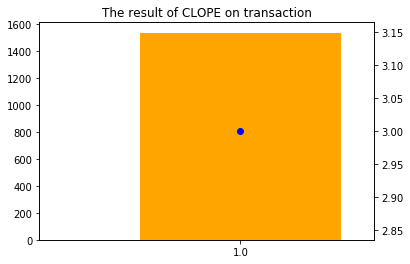

In [28]:
#plot the graph repulsion vs number of clusters, repulsion vs purity

width = .6 # width of a bar

draw = pd.DataFrame({'purity' : purity_list, 'no.clusters' : num_clusters_list})

draw ['purity'].plot(kind='bar', width = width, color="orange")
draw ['no.clusters'].plot(secondary_y=True, marker='o', color='blue')

plt.xlim([-width, len(draw ['purity'])-width])
ax = plt.gca()
ax.set_xticklabels(repulsion)

plt.title('The result of CLOPE on transaction')

plt.show()

x-axis:  **repulsion** <br>
left y-axis:  **purity** <font color='orange'>--orange bar</font> <br>
right y-axis:  **no.clusters** <font color='blue'>--blue line</font> <br>

In [30]:
import platform
print(platform.python_version())



3.6.8
